# Алгоритмы анализа данных

### Домашнее задание №2 Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

1)Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

X_, y_, coef = datasets.make_regression(n_samples=1000, 
                                      n_features=2, 
                                      n_informative=2, 
                                      n_targets=1,
                                      noise=5, 
                                      coef=True, 
                                      random_state=42)

In [2]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [3]:
# Метод градиентного спуска
def eval_GD(X, y, iterations, eta=1e-4):
    errs=[]
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        errs.append(err)
        w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)))
        if i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
    return w, errs

In [4]:
def standardization(x: np.ndarray) -> np.ndarray:
    '''Функция принимает и возвращает одномерный массив'''
    s = (x - x.mean()) / x.std()
    return s

In [5]:
# SGD - стохастический градиентный спуск
def eval_SGD(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    errs=[]
    for i in range(1, iterations + 1):
        err = calc_mse(y, np.dot(X, w))
        errs.append(err)
        # генерируем случайный индекс объекта выборки
        ind = np.random.randint(n)
        y_pred = np.dot(X[ind], w)
        w -= eta * (2 * np.dot(X[ind].T, (y_pred - y[ind])))
        if i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
    return w, err, errs

In [6]:
# mini-batch градиентный спуск
def eval_mbGD(X, y, iterations, batch=1, eta=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    n_batch = n // batch # число батчей
    errs=[]
    if n % batch != 0:
        n_batch += 1
    print('Количество батчей - ', n_batch)
    for i in range(1, iterations + 1):
        err = calc_mse(y, np.dot(X, w))
        errs.append(err)
        for b in range(n_batch):
            start_ = batch * b
            end_ = batch * (b + 1)
            X_batch = X[start_ : end_, :]
            y_batch = y[start_ : end_]
            y_pred = np.dot(X_batch, w)
            w -= eta * (2/len(y_batch) * np.dot(X_batch.T, (y_pred - y_batch)))
        if i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
    return w, err, errs

In [7]:
iterat = 1200
ETA = 1e-3

In [8]:
# стандартизация
X_st = X_.copy().astype(np.float64)
X_st[:, 0] = standardization(X_[:, 0])
X_st[:, 1] = standardization(X_[:, 1])
#print(X_st[:, 0])
#print(X_st[:, 1])

In [9]:
%%time
w_gd, errs_gd = eval_GD(X_st, y_, iterations=iterat, eta=ETA)
y_pred = np.dot(X_st, w_gd)
err_gd = calc_mse(y_, y_pred)
print(f'MSE для метода градиентного спуска для данных c стандартизацией - {err_gd}\n')

120: weights=[8.78701672 1.36174078], MSE=992.576
240: weights=[15.30610082  2.5373516 ], MSE=624.039
360: weights=[20.4323882   3.45871175], MSE=396.202
480: weights=[24.46345019  4.18079996], MSE=255.349
600: weights=[27.63328161  4.74670821], MSE=168.271
720: weights=[30.12588407  5.19021135], MSE=114.438
840: weights=[32.08594708  5.53778131], MSE=81.157
960: weights=[33.62724719  5.81016596], MSE=60.582
1080: weights=[34.83925257  6.02362659], MSE=47.862
1200: weights=[35.79231654  6.19090802], MSE=39.998
MSE для метода градиентного спуска для данных c стандартизацией - 39.94747787232421

Wall time: 98 ms


In [10]:
%%time

w_SGD,err_SGD, errs_SGD = eval_SGD(X_st, y_, iterations=iterat, eta=ETA) 

120: weights=[7.15952821 1.82849528], MSE=1086.544
240: weights=[15.15486524  4.17348449], MSE=618.520
360: weights=[20.49783787  4.87329342], MSE=384.717
480: weights=[24.91016471  5.4232574 ], MSE=236.465
600: weights=[28.42921525  5.78658852], MSE=146.551
720: weights=[30.66967419  5.88495568], MSE=102.709
840: weights=[32.66098295  6.10446496], MSE=71.925
960: weights=[33.7983281   6.27337875], MSE=58.029
1080: weights=[35.00708536  6.43090107], MSE=45.839
1200: weights=[36.09173625  6.74924512], MSE=37.550
Wall time: 112 ms


In [11]:
%%time

w_mbSGD, err_mbGD, errs_mbGD = eval_mbGD(X_st, y_, iterations=iterat, batch=600, eta=ETA) 

Количество батчей -  2
120: weights=[15.24488226  2.48204718], MSE=629.856
240: weights=[24.38307772  4.10655468], MSE=259.066
360: weights=[30.04524613  5.11369808], MSE=116.538
480: weights=[33.55361377  5.73809634], MSE=61.712
600: weights=[35.72745281  6.12520498], MSE=40.597
720: weights=[37.07439715  6.36520144], MSE=32.450
840: weights=[37.90898467  6.51399276], MSE=29.297
960: weights=[38.42610796  6.60623953], MSE=28.072
1080: weights=[38.74652551  6.66343025], MSE=27.591
1200: weights=[38.94506113  6.69888714], MSE=27.401
Wall time: 167 ms


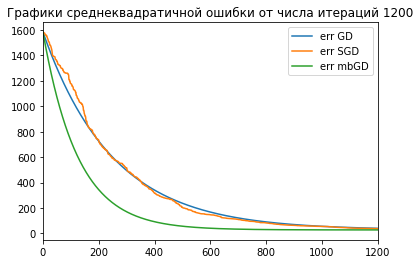

In [12]:
plt.plot(errs_gd,label=r'err GD')
plt.plot(errs_SGD,label=r'err SGD')
plt.plot(errs_mbGD,label=r'err mbGD')
plt.title(f"Графики среднеквадратичной ошибки от числа итераций {iterat}")
plt.xlim([0, iterat])
plt.legend();

2)[*] Добавить в алгоритм градиентного спуска L1 регуляризацию. Сравнить влияние коэффициентов регуляризации L1 и L2 на величину весов для примера из урока (лучше графически).

In [13]:
def eval_model_reg2(X, y, iterations, eta=1e-4, lambda_=1e-8, verbose=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)) + 2 * lambda_ * w)
        if verbose and i % (iterations / 10) == 0:
            print(f'L2 = {i}: weights={w}, MSE={err:.3f}')
    return w

In [14]:
def eval_model_reg1(X, y, iterations, eta=1e-4, lambda_=10, verbose=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]    
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        #w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)) + 2 * lambda_ * w)
        w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)) + lambda_ * np.sign(w)) 
        if verbose and i % (iterations / 10) == 0:
            print(f'L1 = {i}: weights={w}, MSE={err:.3f}')
    return w

In [15]:
def eval_model_ElasticNet(X, y, iterations, eta=1e-4, L1_=0, L2_=1e-8, verbose=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]    
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        #w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)) + 2 * lambda_ * w)
        w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)) + 2 * L2_ * w + L1_ * np.sign(w)) 
        if verbose and i % (iterations / 10) == 0:
            print(f'L1+L2 = {i}: weights={w}, MSE={err:.3f}')
    return w

In [16]:
w_l2 = eval_model_reg2(X_st, y_, iterations=1000, eta=1e-3, lambda_=1e-8, verbose=True)

L2 = 100: weights=[7.5398916  1.13641926], MSE=1073.133
L2 = 200: weights=[13.30466326  2.17684739], MSE=727.798
L2 = 300: weights=[18.02307356  3.0260637 ], MSE=496.490
L2 = 400: weights=[21.88504811  3.7192039 ], MSE=341.557
L2 = 500: weights=[25.04603886  4.28494842], MSE=237.782
L2 = 600: weights=[27.63328148  4.74670819], MSE=168.271
L2 = 700: weights=[29.75091693  5.1235927 ], MSE=121.713
L2 = 800: weights=[31.48418348  5.43120021], MSE=90.527
L2 = 900: weights=[32.90284773  5.6822628 ], MSE=69.639
L2 = 1000: weights=[34.06401292  5.88717294], MSE=55.647


In [17]:
w_l1 = eval_model_reg1(X_st, y_, iterations=1000, eta=1e-3, lambda_=2, verbose=True)

L1 = 100: weights=[7.35848871 0.98479627], MSE=1086.360
L1 = 200: weights=[12.97484889  1.87142247], MSE=747.975
L1 = 300: weights=[17.57183966  2.59480452], MSE=519.379
L1 = 400: weights=[21.33447756  3.18499244], MSE=364.675
L1 = 500: weights=[24.41419827  3.66650572], MSE=259.754
L1 = 600: weights=[26.93495163  4.05935105], MSE=188.416
L1 = 700: weights=[28.99819039  4.37985267], MSE=139.765
L1 = 800: weights=[30.68695351  4.64133007], MSE=106.468
L1 = 900: weights=[32.06920829  4.85465093], MSE=83.584
L1 = 1000: weights=[33.20058588  5.02868239], MSE=67.782


In [18]:
w_l1_l2 = eval_model_ElasticNet(X_st, y_, iterations=1000, eta=1e-3, L1_=0.1, L2_=1e-8,verbose=True)

L1+L2 = 100: weights=[7.53082138 1.12900514], MSE=1073.790
L1+L2 = 200: weights=[13.28817241  2.16171287], MSE=728.796
L1+L2 = 300: weights=[18.00051169  3.00461266], MSE=497.615
L1+L2 = 400: weights=[21.85751939  3.69258494], MSE=342.684
L1+L2 = 500: weights=[25.01444664  4.25410127], MSE=238.843
L1+L2 = 600: weights=[27.59836479  4.71240171], MSE=169.233
L1+L2 = 700: weights=[29.71328042  5.08645594], MSE=122.562
L1+L2 = 800: weights=[31.44432181  5.39174783], MSE=91.264
L1+L2 = 900: weights=[32.86116559  5.64091587], MSE=70.270
L1+L2 = 1000: weights=[34.02084141  5.84427597], MSE=56.183


In [25]:
def experiment(reg = 1, verbose = False):
    if reg ==1 or reg==2 or reg==3: 
        w_list = []
        l_list = []
        error_list = []

        for l in np.logspace(start=-4, stop=1, num=20):
            l_list.append(l)
            if reg == 1:
                w_new = eval_model_reg1(X_st, y_, iterations=1000, eta=1e-2, lambda_= l)
            if reg == 2:
                w_new = eval_model_reg2(X_st, y_, iterations=1000, eta=1e-2, lambda_= l)
            if reg == 3:
                w_new = eval_model_ElasticNet(X_st, y_, iterations=1000, eta=1e-3, L1_=0.01, L2_=l,verbose=verbose)
            w_list.append(w_new)
            error_list.append(calc_mse(y_, np.dot(X_st, w_new)))
        weights = np.array(w_list)
        errors = np.array(error_list)
        return weights, errors, l_list
    else:
        print("Неверно задан номер эксперимента. укажите для L1 =1, L2=2, L1 и L2 =3")
        return None, None, None

In [26]:
weights1, errors1,l_list1 = experiment(reg = 1,verbose = False)
weights2, errors2,l_list2 = experiment(reg = 2,verbose = False)
weights3, errors3,l_list3 = experiment(reg = 3,verbose = False)

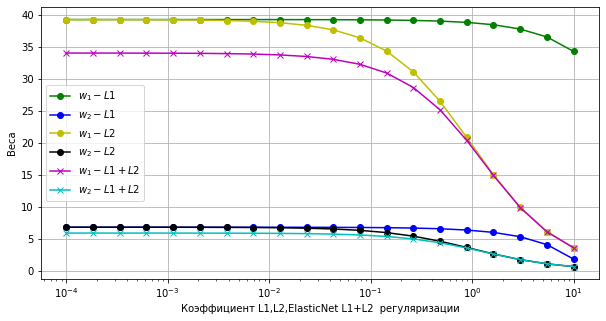

In [27]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
#plt.plot(l_list, weights[:, 0], 'mo-', label=r'$w_0$')
plt.plot(l_list1, weights1[:, 0], 'go-', label=r'$w_1-L1$')
plt.plot(l_list1, weights1[:, 1], 'bo-', label=r'$w_2-L1$')
plt.plot(l_list2, weights2[:, 0], 'yo-', label=r'$w_1-L2$')
plt.plot(l_list2, weights2[:, 1], 'ko-', label=r'$w_2-L2$')
plt.plot(l_list3, weights3[:, 0], 'mx-', label=r'$w_1-L1+L2$')
plt.plot(l_list3, weights3[:, 1], 'cx-', label=r'$w_2-L1+L2$')
plt.xlabel('Коэффициент L1,L2,ElasticNet L1+L2  регуляризации')
plt.ylabel('Веса')
plt.grid()
plt.legend();

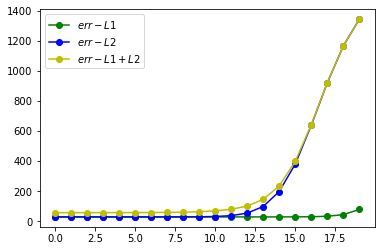

In [30]:
plt.plot(errors1, 'go-', label=r'$err-L1$')
plt.plot(errors2, 'bo-', label=r'$err-L2$')
plt.plot(errors3, 'yo-', label=r'$err-L1+L2$')
plt.legend();

для меня:
L1-регуляризация реализует это путём отбора наиболее важных факторов, которые сильнее всего влияют на результат. Для простоты можете считать, что факторы с малой величиной влияния на конечный результат фактически «помогают» вам предсказывать лишь шум в наборе обучающих данных.
L2-регуляризация предотвращает переобученность модели путём запрета на непропорционально большие весовые коэффициенты.